# Découpage élémentaire par phases.

In [1]:
import re
import numpy as np
import pandas as pd
import tabata as tbt
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

import Projet_rectangularisation_vols as m2d

%reload_ext autoreload
%autoreload 2

In [2]:
# Chargement des données.
datadir = "../Data/cleaned/"
final_file = datadir + "AFL1EB_cleaned_final.h5"
norm_file = datadir + "AFL1EB_normed_alt.h5"
ds = tbt.Opset(final_file)
ds

OPSET '../Data/cleaned/AFL1EB_cleaned_final.h5' de 47 signaux.
        position courante : sigpos  = 0
        variable courante : colname = ALT[m]
        phase surlignée   : phase   = None

In [3]:
ds.plot()

## Création d'une série d'instants de changement de phase par vol.

In [4]:
df = ds[23]
y = df['ALT[m]'].values
n = len(y)
t = np.arange(0,n)


In [5]:
df.index.name

'record_28'

In [6]:
t1 = np.max(np.argwhere((y<y[0]+10) & (t<n/3)))
t1

1304

In [7]:
t4 = np.min(np.argwhere((y<y[-1]+10) & (t>2*n/3)))
t4

5879

In [8]:
dy = np.append(np.diff(y),0)
k = 3
dyc = np.convolve(dy,np.ones(2*k+1)/(2*k+1))
dyc = dyc[k:-k]
mx = np.max(y)
tx = np.argwhere(y==mx)
txm = (tx[0]+tx[-1])/2
t2 = np.min(np.argwhere((y>mx-mx/10) & (dyc<2.5) & (t>t1) & (t<txm)))
t3 = np.max(np.argwhere((y>mx-mx/10) & (dyc>-2.5) & (t<t4) & (t>txm)))

In [9]:
t1,t2,t3,t4,txm

(1304, 2311, 3660, 5879, array([3106.]))

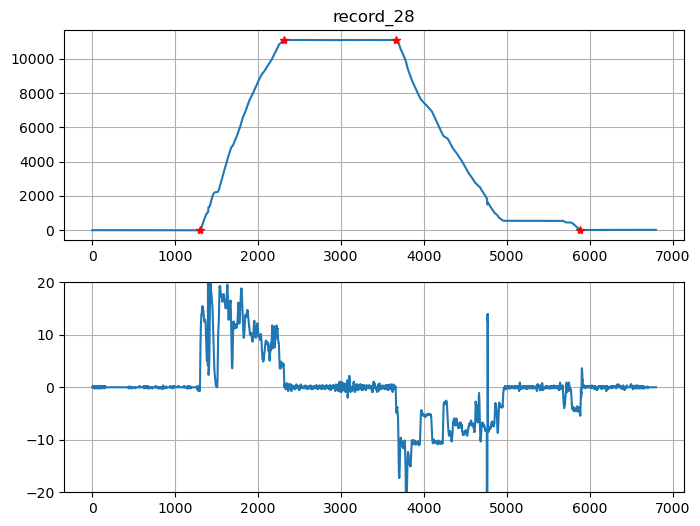

In [10]:
plt.figure(figsize=(8,6))
ax1 = plt.subplot(2,1,1)
plt.plot(y)
plt.plot([t1, t2, t3, t4],[y[t1],y[t2],y[t3], y[t4]],'*r')
plt.grid()
plt.title(df.index.name)
ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.plot(dyc)
plt.ylim([-20,20])
plt.grid()

In [11]:
t1,t2,t3,t4

(1304, 2311, 3660, 5879)

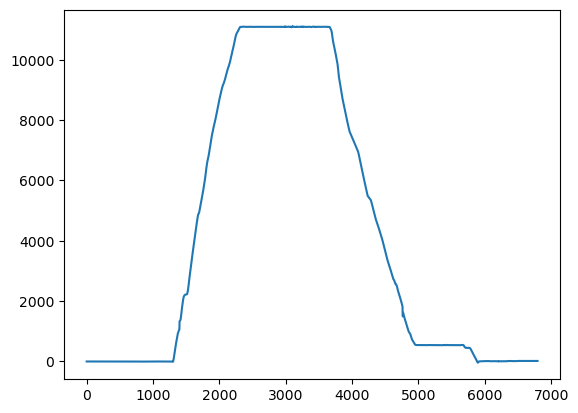

In [12]:
fig,ax = plt.subplots()
ax.plot(y)

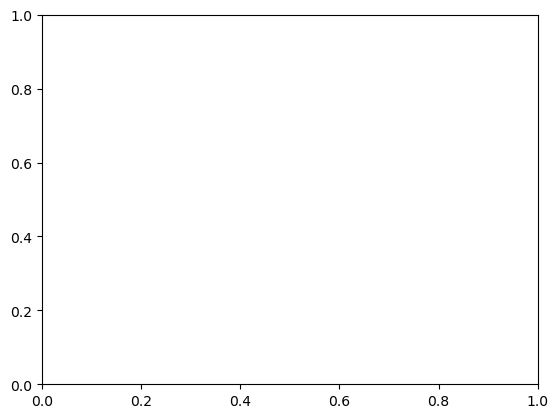

In [13]:
fig, ax = plt.subplots();

#@widgets.interact(record=(0,len(ds)))
def update_points(record):
    #[l.remove() for l in ax.lines]
    df = ds[record]
    y = df['ALT[m]'].values
    t1,t2,t3,t4 = m2d.compute_points(df)
    print(record)
    print(t1,t2,t3,t4)

    # Affichage
    ax.cla()
    ax.plot(y)
    ax.plot([t1, t2, t3, t4],[y[t1],y[t2],y[t3], y[t4]],'*r')
    ax.grid()
    ax.set_title(df.index.name)
    display(fig);

In [14]:
widgets.interact(update_points,record=(0,len(ds)))

interactive(children=(IntSlider(value=23, description='record', max=47), Output()), _dom_classes=('widget-inte…

<function __main__.update_points(record)>

In [15]:
L = []
for i,df in enumerate(ds):
    t1,t2,t3,t4 = m2d.compute_points(df)
    
    L.append({'record' : i, 'points' : np.array([t1,t2,t3,t4])})
    

In [16]:
L

[{'record': 0, 'points': array([ 855, 1906, 5593, 6643])},
 {'record': 1, 'points': array([ 670, 1748, 5108, 6745])},
 {'record': 2, 'points': array([ 984, 2149, 5208, 6525])},
 {'record': 3, 'points': array([ 645, 1678, 3870, 5814])},
 {'record': 4, 'points': array([ 740, 1601, 2336, 4271])},
 {'record': 5, 'points': array([ 480, 1370, 1798, 3000])},
 {'record': 6, 'points': array([ 615, 1591, 5009, 6479])},
 {'record': 7, 'points': array([1320, 2310, 4823, 6323])},
 {'record': 8, 'points': array([1072, 2011, 4776, 6243])},
 {'record': 9, 'points': array([1044, 2504, 6123, 7400])},
 {'record': 10, 'points': array([ 654, 1482, 5152, 6693])},
 {'record': 11, 'points': array([ 868, 1833, 5382, 6877])},
 {'record': 12, 'points': array([ 804, 1728, 4500, 6962])},
 {'record': 13, 'points': array([ 928, 1769, 5771, 7348])},
 {'record': 14, 'points': array([ 735, 1601, 5065, 6484])},
 {'record': 15, 'points': array([1345, 2267, 4930, 6267])},
 {'record': 16, 'points': array([ 705, 1656, 3232,

## Découpage en phase.
### Recherche des statistiques par phase.

In [17]:
P = m2d.compute_all_sizes(ds)

In [18]:
P

array([[ 855, 1051, 3687, 1050,  786],
       [ 670, 1078, 3360, 1637,  714],
       [ 984, 1165, 3059, 1317,  517],
       [ 645, 1033, 2192, 1944,  643],
       [ 740,  861,  735, 1935,  589],
       [ 480,  890,  428, 1202,  510],
       [ 615,  976, 3418, 1470,  548],
       [1320,  990, 2513, 1500,  777],
       [1072,  939, 2765, 1467,  823],
       [1044, 1460, 3619, 1277,  486],
       [ 654,  828, 3670, 1541,  717],
       [ 868,  965, 3549, 1495,  544],
       [ 804,  924, 2772, 2462, 1007],
       [ 928,  841, 4002, 1577,  539],
       [ 735,  866, 3464, 1419,  600],
       [1345,  922, 2663, 1337,  459],
       [ 705,  951, 1576, 1150,  734],
       [1398, 1201, 4312, 1425,  701],
       [ 732, 1003, 5078, 2130,  909],
       [1073, 1222, 4304, 1851,  505],
       [ 743,  981, 2614, 1576,  676],
       [ 832,  926, 3908, 1438,  708],
       [ 834, 1061, 2997, 1477,  581],
       [1304, 1007, 1349, 2219,  917],
       [1051,  973, 2321, 1332,  538],
       [1068,  925,  815,

In [19]:
NL = P.max(axis=0)
NL

array([2295, 2080, 8758, 4239, 1344])

In [20]:
cols = [re.sub('\[.*\]','', col) for col in ds.df.columns]
R = {c : [] for c in cols}
rec = []
for df in ds:
    rec.append(df.index.name)
    I = m2d.compute_points(df)
    I = [0] + list(I) + [len(df)-1]
    for V,C in zip(cols,df.columns):
        x = df[C].values
        # Etape de normalisation.
        x0 = np.max(x)
        x1 = np.min(x)
        xn = (x-x0)/(x1-x0)
        # Etape d'interpolation.
        Y = np.array(xn[0])
        for i in range(len(I)-1):
            t0 = df.index[I[i]].value
            t1 = df.index[I[i+1]].value
            t = pd.to_datetime(np.linspace(t0,t1,NL[i]))
            y = np.interp(t,df.index[I[i]:I[i+1]],xn[I[i]:I[i+1]])
            Y = np.hstack([Y,y[1:]])
        R[V].append(Y)

# Transformation en tables.
for V in cols:
    R[V] = pd.DataFrame(data=np.vstack(R[V]).T, columns=rec)

In [22]:
R = m2d.frust_phase_nrm(ds, NL)

<AxesSubplot:>

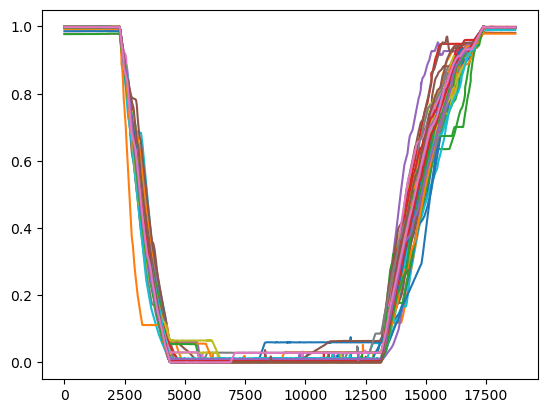

In [23]:
R['ALT'].plot(legend=False)